<a href="https://colab.research.google.com/github/Rogerio-mack/MDJ/blob/main/EADMDJ_A6_SupervisionadoII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"> EAD <b>Mineração de Dados para Jogos </b> </font></h1>

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">A6 Modelos Supervisionados II: Classificação e Regressão</font></h1>
<hr>

Nesta seção você verá dois temas relacionados ao aprendizado supervisionado. Primeiro você aprenderá um novo método de aprendizado para tarefas de classificação. Em seguida você vai aprender a empregar métodos de Regressão Linear que, diferentemente dos modelos anteriores, busca prever valores no lugar de classes.

# **Árvores de Decisão**
 
Uma Árvore de Decisão permite fazer classificações por **particionamentos sucessivos** dos dados. É uma estrutura que traduz uma tabela de decisão.


<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/TIC/decisiontree.PNG" width=500, align="center"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Algoritmo de Hunt

Vejamos um exemplo.

In [ ]:
import pandas as pd
comics = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics.csv',sep=';')
comics

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,male,no,no,yes,yes,yes,good
1,Robin,male,no,no,yes,yes,yes,good
2,Catwoman,female,no,no,yes,no,yes,bad
3,Joker,male,no,no,no,no,no,bad
4,Alfred,male,no,yes,no,no,no,good
5,Penguin,male,yes,yes,no,no,no,bad


Acesse para detalhes http://meusite.mackenzie.br/rogerio/TIC/comics.xlsx

# Ganho de Informação

Como você viu diferentes Árvores de Decisão podem ser construídas. A decisão dos Algoritmos para a decisão de que atributos empregar como Raiz e Nós na construção de uma Árvore são feitos com base em medidas do Ganho de Informação.

Para o cálculo do **Ganho de Informação** de um atributo existem 3 valores comumente empregados.

## **Entropia.**

$$ Entropia(s) = - \sum_i p_i log p_i $$

Exemplos:

$$ Entropia(CONSTANTE) = 0 $$
$$ Entropia(bit) = 1 $$

## **Índice Gini.**

$$ Gini(s) = 1 - \sum_i p_i $$ 

## **Classification Error**

$$ ClassificationError = 1 - max p_i $$

<br>

O ganho de informação é então obtido como:

$$ IG(a) = D(T) - \sum_i p_i D(T | a_i) $$

Onde $D()$ é uma das medidas de Entropia, índice *Gini* ou *Classification Error*. 

# Prós e Limitações do Modelo

## Prós
* Não é um modelo *black-box*
* É eficiente
* **Permite trabalhar diretamente com valores categóricos**

## Limitações
* Tem um alto custo de treinamento
* É sensível a sobreajuste(\*)

(\*) Para minimizar esse efeito pode-se fazer a *poda* de níveis da Árvore ou emprego de **Random Forests**, entendidas como uma média de Árvores de Decisão.


# **IMPORTANTE:** Antes de começar 

Execute a célula final desse LAB SET UP (antes da sessão de Regressão Linear). Ela irá **inicializar** o seu ambiente com os datasets requeridos para esse lab que poderão ser então lidos como arquivos locais, isto é `df = pd.read_csv('df.csv')`. 

Após a execução você pode verificar os datasets criados na aba lateral do Google Colab ou no seu diretório de trabalho.

# Case: **Previsão do Sucesso de novos Projetos**, com Knn e uma Árvore de Decisão

Compare verifique que a estrutura de uso dos modelos é a mesma. 

### IMPORTANTE
> A *mesma estrutura* pode ser empregada para diferentes modelos de **Aprendizado Supervisionado**, como **knn**,  **Árvores de Decisão** e ainda NaiveBayes, Logist Regression, Random Forest etc.  

> A *mesma estrutura* pode ser empregada para diferentes dados, `projects`, `insurance`, `breast`... em modelos de **Aprendizado Supervisionado**.  


## Solução empregando o modelo Knn

Veja abaixo a solução de predição do status de projetos com o modelo `knn`.

In [ ]:
# Acessando os dados
projects = pd.read_csv('projects.csv')
print(projects.head())

new_projects = pd.read_csv('new_projects.csv')
print(new_projects.head())


   Ana  Gabriela  Pedro  Luiz     Status
0    1         1      0     1  successed
1    1         1      1     1  successed
2    0         0      1     0     failed
3    0         0      1     1     failed
   Ana  Gabriela  Pedro  Luiz Status
0    0         1      1     0      ?
1    1         1      1     0      ?


In [ ]:
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = projects.drop(columns=['Status'])           # Entradas
y_train = projects['Status']                          # Saída

# Declara o Modelo
n_neighbors = 3                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_projects.drop(columns=['Status'])        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)



['failed' 'successed']


In [ ]:
new_projects['Status'] = y_pred
print(new_projects)

   Ana  Gabriela  Pedro  Luiz     Status
0    0         1      1     0     failed
1    1         1      1     0  successed


## Solução empregando Árvore de Decisão

Veja agora o mesmo problema com uma **Árvore de Decisão**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Prepara os dados para o Treinamento
X_train = projects.drop(columns=['Status'])           # Entradas
y_train = projects['Status']                          # Saída

# Declara o Modelo
clf = DecisionTreeClassifier()
'''
clf = DecisionTreeClassifier(criterion='gini',
#                              min_samples_leaf=5,
#                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
'''
# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_projects.drop(columns=['Status'])        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)

['successed' 'successed']


## **Experimente você**

Empregue os códigos acima e faça a predição de Faixas de Seguros empregando o **modelo de Árvore de Decisão** as bases de `insurances` criadas no Set Up desse notebook.

```
insurance.csv
new_insurance.csv
```


# Avaliando os modelos

Assim como você empregou o `R-Squared` para avaliar um modelo de Regressão Linear é importante termos uma forma de avaliarmos os modelos de Classificação.

Vamos então aprender e praticar os seguintes conceitos:

1.   **Conjunto de Treinamento** e **Conjunto de Teste** 
1.   Acuracidade
1.   Matriz de Confusão

Nossa avaliação dos modelos vai se concentrar na **acuracidade do modelo** e na **matriz de confusão** com seus resultados embora existam muitas outras métricas. 

Podemos fazer isso medindo a quantidade de acertos do modelo sobre uma **parcela do conjunto de treinamento** que separamos para servir de **Conjunto de Teste**. Como para esses dados temos as respostas, podemos 'medir' o percentual de acerto do nosso modelo.

Isso serve para verificar se nosso modelo tem um grau de assertividade aceitável, além de poder ser empregado para:

1. **Ajustar os modelos** (*k do knn, profundidade da Árvore em uma Árvore de Decisão*) 
1. **Selecionar os modelos** (*entre dois modelos para classificação, um knn e outro uma Árvore de Decisão, você pode optar pelo de maior acuracidade*)





# Caso: **Predição de Diagnósticos a partir de Dados de Imagens** 

Agora vamos ver um caso de dados reais.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Veja também: https://niklausliu.github.io/files/Yi-Decision%20Tree%20Model%20in%20the%20Diagnosis%20of%20Breast%20Cancer.pdf

Os dados estão na URL: https://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv

Mas aqui empregue os dados já tratados no set up do Lab:

```
breast.csv
new_breast.csv
```



In [ ]:
# Acessando os Dados

# Seu código aqui 
breast = pd.read_csv('breast.csv')
print(breast.head())

new_breast = pd.read_csv('new_breast.csv')
print(new_breast.head())


  diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]
   radius_mean  texture_mean  ...  fractal_dimension_worst  diagnosis
0        6.981          9.71  ...                  0.05504          ?
1       11.700         16.17  ...                  0.07146          ?
2       13.370         18.84  ...                  0.08004          ?
3       15.780         21.80  ...                  0.09208          ?
4       28.110         39.28  ...                  0.20750          ?

[5 rows x 31 columns]


In [ ]:
# Explore os dados
# Seu código aqui
breast.shape
breast.diagnosis.value_counts()
breast.isnull().sum()
breast.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# **Árvore de Decisão**: Treinamento e Teste

Os conjuntos de Treinamento e Teste são produzidos **randomicamente**. O `seed` é a semente de geração aleatória e garante a reprodutibilidade das execuções. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Preparando os dados
X = breast.drop(columns=['diagnosis'])
y = breast['diagnosis']

# Separando os dados de Treinamento e Teste
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

# Declarando o Modelo
clf = DecisionTreeClassifier(criterion='gini',
#                              min_samples_leaf=5,
#                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)

# Aprendizado 
clf.fit(X_train, y_train)                  # Emprega o conjunto de treinamento 

y_pred = clf.predict(X_test)

print(y_pred)


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B']


# Apresentando os resultados

Não se preocupe com este código, ele está aqui apenas para apresentar os resultados para que você entenda o que está acontecendo. 

In [ ]:
# pd.set_option('display.max_rows',None)

a = pd.DataFrame(y_pred)
b = pd.DataFrame(np.array(y_test))
c = a == b
d = pd.concat([a,b,c],axis=1)

d.columns=['Real','Predicted','Equal?']
# print(d)
print(d[d['Equal?'] == False])


    Real Predicted  Equal?
14     B         M   False
24     B         M   False
29     M         B   False
32     M         B   False
60     M         B   False
61     B         M   False
78     B         M   False
79     M         B   False
82     B         M   False
100    B         M   False
159    M         B   False
167    B         M   False


# Interpretando o **`classification_report`**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_pred, y_test)
print(cm)
    
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print(classification_report(y_pred,y_test))

[[102   7]
 [  5  57]]
0.9298245614035088
              precision    recall  f1-score   support

           B       0.95      0.94      0.94       109
           M       0.89      0.92      0.90        62

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



# Exibindo a Árvore

Não vamos trabalhar com o gráfico das Árvores. Mas deixamos o código aqui para que você empregue se tiver interesse.

[Text(207.0853448275862, 203.85, 'X[28] <= 0.142\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(148.6396551724138, 176.67000000000002, 'X[21] <= 17.72\ngini = 0.148\nsamples = 261\nvalue = [240, 21]'),
 Text(101.01724137931033, 149.49, 'X[14] <= 42.95\ngini = 0.078\nsamples = 247\nvalue = [237, 10]'),
 Text(63.49655172413793, 122.31, 'X[21] <= 15.77\ngini = 0.049\nsamples = 238\nvalue = [232, 6]'),
 Text(23.089655172413792, 95.13, 'X[22] <= 33.27\ngini = 0.01\nsamples = 205\nvalue = [204, 1]'),
 Text(11.544827586206896, 67.94999999999999, 'gini = 0.0\nsamples = 192\nvalue = [192, 0]'),
 Text(34.63448275862069, 67.94999999999999, 'X[2] <= 23.2\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(23.089655172413792, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.179310344827584, 40.77000000000001, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(103.90344827586206, 95.13, 'X[25] <= 0.13\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(80.81379

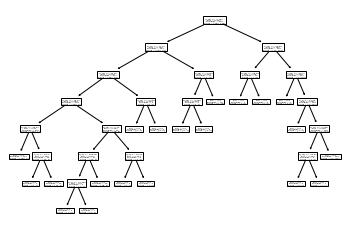

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

# **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
#
# set up environment 
#

#
# import basics
# 

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

#
# Create all files for this lab: 
#
# projects.csv
# new_projects.csv
# insurance.csv
# new_insurance.csv
# breast.csv
# new_breast.csv
#

import pandas as pd


import pandas as pd
projects = pd.DataFrame({ 'Ana':[1,1,0,0],
                         'Gabriela':[1,1,0,0],
                         'Pedro':[0,1,1,1],
                         'Luiz':[1,1,0,1],
                         'Status':['successed','successed','failed','failed']})
projects.to_csv('projects.csv',index=False)

new_projects = pd.DataFrame({ 'Ana':[0,1],
                         'Gabriela':[1,1],
                         'Pedro':[1,1],
                         'Luiz':[0,0],
                         'Status':['?','?']})
new_projects.to_csv('new_projects.csv',index=False)

insurance    = pd.DataFrame({ 'Age':[21,20,35,40],
                         'Income':[5,3.5,8,12],
                         'Car_Value':[40,40,34,60],
                         'Years_Hab':[3,2,10,12],
                         'Insurance':['high','high','low','low']})
insurance.to_csv('insurance.csv',index=False)

new_insurance    = pd.DataFrame({ 'Age':[19,50,23],
                         'Income':[5,10,4],
                         'Car_Value':[50,45,80],
                         'Years_Hab':[1,15,1],
                         'Insurance':['?','?','?']})
new_insurance.to_csv('new_insurance.csv',index=False)

breast = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
breast = breast.drop(columns=['Unnamed: 32'])
breast.to_csv('breast.csv',index=False)

new_breast = pd.DataFrame(breast.quantile(0)).transpose()
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.25)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.50)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.75)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(1.00)).transpose()])
new_breast['diagnosis'] = '?'
# new_breast.drop(columns=['id'], inplace=True)
new_breast.to_csv('new_breast.csv',index=False)

from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = pd.unique(dataframe[label_col])
    # Obtaining plot data.
    graph_data = export_graphviz(tree,
        feature_names=dataframe.drop(label_col, axis=1).columns,
        class_names=label_names,
        filled=True,
        rounded=True,
        out_file=None)
    # Generating plot.
    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph

seed = 1984


# **Regressão Linear** 

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$  \widehat Y = a_0 + a_{1} X_{1} + a_{2} X_{2} + ... + a_{n} X_{n} $ 
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat Y$ para $X=0$ (*intercept*). 






## Obtendo os Coeficiente $a_n$, Método dos Mínimos Quadrados

Os coeficientes $a_n$ podem ser obtidos minimizando-se a soma da distância entre os valores reais $Y$ e os valores estimados $\widehat Y$. 

Para uma única variável $X$, podemos escrever:

$$min \sum d(Y, \widehat Y) = $$

$$ min \sum (y_i - \widehat y_i )^2 = $$ 

$$ min \sum (y_i - a_0 - a_i x_i )^2 $$ 

Esta é uma função convexa e os pontos de mínimo com relação aos valores coeficientes podem ser obtidos derivando-se a função. O resultado será: 

$$a_1 =  \frac{COV(x,y)}{VAR(x)} $$

$$ a_0 = \bar y - a_1 \bar x $$

Para mais detalhes veja: 
1. https://en.wikipedia.org/wiki/Regression_analysis
2. https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados








## Notas Práticas

1. Este é um modelo de Ciência de Dados? Note que regressão linear extrai de um conjunto de dados um modelo, um padrão para os dados, não óbvio e a partir do qual podemos fazer inferências úteis... reveja então nossa definição de Ciência de Dados. 
1. Note que quaisquer conjuntos de pontos apresentam podem ter os coeficientes da regressão calculados, mesmo não tendo uma aproximação linear.
1. O procedimento acima, para uma dimensão, se aplica a qualquer número de dimensões. 
1. Para a regressão linear o método dos mínimos quadrados permite a solução analítica. Em outros tipo de regressão, polinimial por exemplo, pode não haver uma solução analítica. O procedimento, entretanto, de se buscar um mínimo dos quadrados (uma função convexa) pode ainda ser aplicado (como, você tem alguma sugestão?)

## Uma regressão linear simples

Vamos começar com uma regressão simples de valores aleatórios apenas para você se familiarizar com a construção do modelo. 

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Gerando uma amostra de 50 valores "aleatórios" a partir de uma função linear.    

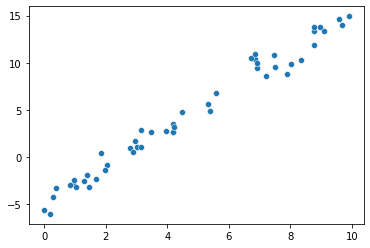

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x, y)

Podemos ainda traçar uma linha de aproximação linear com a função `sns.lmplot()`.

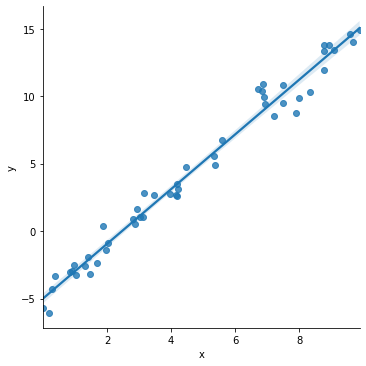

In [ ]:
df = pd.DataFrame({'x':x,'y':y}) 
sns.lmplot('x','y',data=df)


## Construindo o modelo linear, `sm.ols(formula = , data= )`

Um conjunto de dados é informado e o parâmetro `formula` indica as variáveis objetivo e preditoras.

````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + b_1 x $$



In [ ]:
model = sm.ols(formula='y ~ x', data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.71e-42
Time:                        14:14:02   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

E desse modo a aproximação linear é dada por:

$$ y = -4.9986 + 2.0272 x $$

Empregamos então o modelo para estimar os valores de $y$, isto é $\bar y$, a partir do modelo linear. Podemos então comparar os valores de $y$ e $\bar y$ (`predicted`). 


In [ ]:
df['predicted'] = result.predict(df.x)

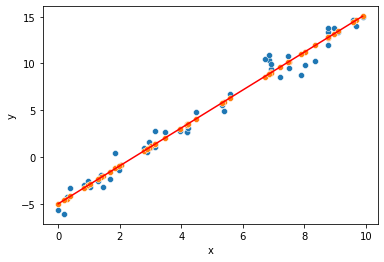

In [ ]:
sns.scatterplot('x','y',data=df)
sns.scatterplot('x','predicted',data=df)
sns.lineplot('x','predicted',data=df,color='red')
plt.show()

### Exercício

Faça o mesmo procedimento acima alterando a função inicial

```
y = 2 * x - 5 + rng.randn(50)
```
Por uma função não linear. Qual a sua conclusão?



## CASO: Estimando a economia de combustível de veículos na cidade

**Fuel economy data from 1999 and 2008 for 38 popular models of car**. Para descrição dos dados acesse https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/mpg.html. 


Para dados mais recentes e detalhados veja:

1. https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv")
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Inicialmente vamos verificar como se relacionam as demais **variáveis numéricas** (mais adiante vamos tirar essa limitação!) com a variável objetivo `cyl`(o consumo dos veículos na cidade).  

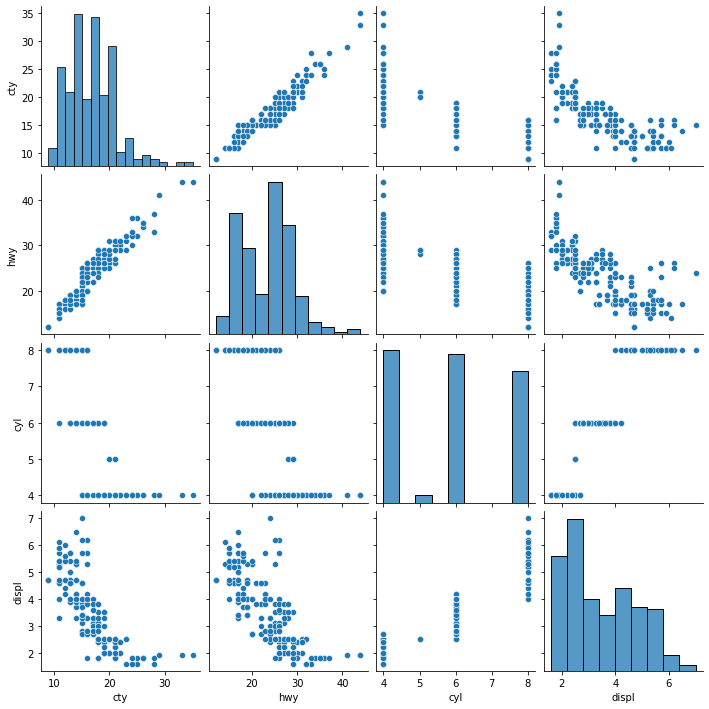

In [ ]:
sns.pairplot(df[['cty','hwy','cyl','displ']])

`hwy` parece ser a variável que mais se aproxima de uma relação linear com `cyl`. Vamos, portanto, tentar determinar o consumo de combustível na cidade `cty` a partir, inicialmente, somente do atributo de consumo dos veículos na estrada, o atributo `hwy`. Isto é, vamos criar um modelo:

$$ \widehat{cty} =  a_0 + a_1 hwy $$



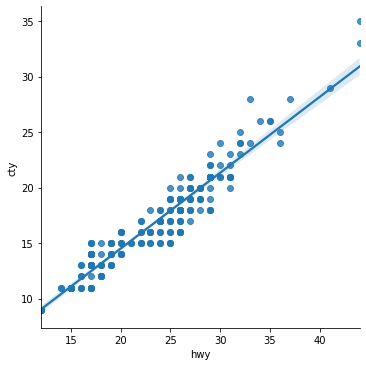

In [ ]:
sns.lmplot('hwy', 'cty', data=df)

In [ ]:
model = sm.ols(formula="cty ~ hwy ", data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2459.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.87e-125
Time:                        14:14:08   Log-Likelihood:                -383.69
No. Observations:                 234   AIC:                             771.4
Df Residuals:                     232   BIC:                             778.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8442      0.333      2.534      0.0

Obtemos assim o modelo:

$$ \widehat{cty} = 0.8442 + 0.6832 \times hwy  $$
 



## Predição de novos valores, `predict(x)`

Podemos agora empregar nosso modelo para estimar o consumo de um novo veículo na cidade, que não conhecemos, mas conhecemos o seu consumo na estrada. Digamos para `hwy = 12` ou ainda `hwy=52`.  

In [ ]:
x = pd.DataFrame({'hwy': [52,12]})
result.predict(x)

0    36.371595
1     9.042831
dtype: float64

**Mas será esse um bom modelo?**

## Verificação Visual

In [ ]:
df['predicted'] = result.predict()

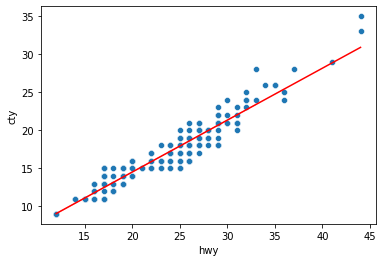

In [ ]:
sns.scatterplot('hwy', 'cty', data=df)
sns.lineplot('hwy', 'predicted', data=df, color='red')
plt.show()


A inspeção visual entretanto é bastante limitada e, no máximo, pode permitir a avaliação de modelos de até 3 dimensões.

# Coeficiente de Determinação, $R^2$

O Coeficiente de Determinação, Coeficiente de Correlação, ou ainda $R-$Square é uma medida de $[0,1]$ que indica o quanto um modelo linear explica um conjunto de dados. Quanto mais próximo de 1, mais os dados se aproximam de um modelo linear.

$$ R^2 = 1 - \frac{SS_e}{SS_{total}} $$

onde 

$$SS_e = \sum (y_i - \widehat y_i )^2 $$ é o (erro) *resíduo* e,

$$SS_{total} = \sum (y_i - \bar y )^2 $$ 

o *erro total*.


Para mais detalhes veja:
1. https://en.wikipedia.org/wiki/Coefficient_of_determination


## $p-value$  dos Coeficientes

Outra medida importante sobre o *p-value* dos coeficientes. Assumindo a hipótese nula do coeficiente ser igual a zero, buscamos coeficientes cujo *p-value* rejeitem a hipótese nula.

$$ H_0: a_i = 0 $$
$$ H_a: a_i \neq 0 $$



## Intervalo de Confiança dos Coeficientes

O Intervalo de Confiança dos Coeficientes possui duas definições equivalentes:

1. O intervalo é o conjunto de valores para os quais um teste de hipótese para o nível de 5% não pode ser rejeitado.
1. O intervalo tem uma probabilidade de 95% de conter o verdadeiro valor de $a_i$ ou ainda, em 95% de todas as amostras que poderiam ser coletadas, o intervalo de confiança cobrirá o valor real de $a_i$.

Para mais detalhes dos intervalos de confiança e p-value, veja:

1. https://www.econometrics-with-r.org/4-3-measures-of-fit.html#application-to-the-test-score-data

## Analisando os dados do modelo

$$ R^2 = 0.914 $$
$$ p-values < 0.05 $$

Podemos ver que esse é um modelo bastante confiável. 

(o intervalo de confiança é uma verificação adicional. Ele dá um range de valores de cada coeficiente, podemos empregá-lo para identificar possíveis desvios nos coeficientes). 

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2459.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.87e-125
Time:                        14:14:08   Log-Likelihood:                -383.69
No. Observations:                 234   AIC:                             771.4
Df Residuals:                     232   BIC:                             778.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8442      0.333      2.534      0.0

## Adicionando variáveis ao modelo

Vamos agora adicionar ao nosso modelo a variável preditora de cilindradas do motor (`displ`). 

In [ ]:
model = sm.ols(formula="cty ~ hwy + displ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1412.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          2.93e-130
Time:                        14:14:08   Log-Likelihood:                -368.30
No. Observations:                 234   AIC:                             742.6
Df Residuals:                     231   BIC:                             753.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7368      0.751      6.306      0.0

Agora o modelo obtido é:

$$cty = 4.7368 + 0.5954 \times hwy - 0.5283 \times displ$$

(por simplicidade adotamos agora $cty$ no lugar de $\widehat{cty}$. Qual a diferença?)

## Analisando os dados do modelo

$$ R^2 = 0.924 $$
$$ p-values < 0.05 $$

Podemos ver que esse é um modelo bastante confiável apresentando um erro menor ainda que o modelo anterior (por que?). 


## Conclusão

1. Modelos de Regressão Lineares são bem definidos (determinísticos), os coeficientes só dependendo das médias dos valores e das variâncias e covariância dos valores.
1. Funcionam para quaisquer dimensões.
1. Podem aplicados a quaisquer conjunto de dados, por isso é necessário avaliar o quanto o modelo de fato se ajusta ao dados (r-square, p-value e intervalo de confiança)
1. O modelo de regressão linear pode ser associado a transformações, como por exemplo a aplicação de $log()$:

$$ Log(y) = a_0 + a_1 x_1 + a_2 x_2 + ...$$

Ou ainda, o método de mínimos quadrados empregado para obter coeficientes de regressões polinomiais e de composição com outras funções:


$$ y = a_0 + a_1 x_1^2 + a_2 x_2^2 + ...$$

ou 

$$ y = a_0 + a_{11} x_1 + a_{12} x_1^2 + a_{21} x_2 + a_{22} x_2^2 +...$$

### Valores Categóricos

Para o emprego de valores categóricos na regressão linear é necessária a codificação dos valores para numérico. Veja no material complementar da T6 o uso do **hot encode** e a aplicação de um modelo de regressão linear para várias variáveis categóricas.

 # **Exercícios de Árvores de Decisão e Modelos Supervisionados em Geral**
 

<img src="http://meusite.mackenzie.br/rogerio/TIC/SUP_ML.png" width=800, align="center"></a>
<h1 align=left><font size = 2, style="color:rgb(200,0,0)"> Fig. 1.Esquema Geral para Modelos Supervisionados </font></h1> 


# Caso: **Propensão de Compra de Clientes por Telemarketing** 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em telefonemas. Freqüentemente, era necessário mais de um contato para o mesmo cliente, para acessar se o produto (depósito bancário) seria ('yes') ou não ('no') assinado.

Os dados estão na URL: http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv




# Exercício 1. Acesse e Explore os dados (**RESOLVIDO**)

1. Qual o atributo **classe**?
1. Quantos registros de cada **classe**?
1. Todos os dados são numéricos? (por quê?)
1. Os dados encontram-se na mesma escala?
1. Qual o tamanho dos dados? (linhas e atributos)
1. Existem valores nulos?


In [ ]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

In [ ]:
# Seu código

bank = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv')
bank.head()
bank.y.value_counts()
bank.dtypes
bank.isnull().sum()
bank.shape
bank.describe(include='all')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Exercício 2. (**RESOLVIDO**)

Aqui verificamos se existem valores ausentes nos dados. Valores ausentes trazem em geral problemas (por quê?) e precisam ser tratados antes de empregarmos modelos. Veremos mais adiante como podemos tratar isso. 

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
if (bank.isnull().sum().sum()) == 0:
  print('Não existem valores ausentes (nulos)')

Não existem valores ausentes (nulos)


# Exercício 3. Defina as entradas `X` e saída `y` modelo (**RESOLVIDO**)

Lembre-se, em um modelo de classificação $X$ são as variáveis preditoras (*independentes*) e $y$ sua variável objetivo (*dependente*).

In [ ]:
# Seu código

X = bank.drop(columns=['y'])
y = bank.y

# Preparação dos Dados

A **Preparação dos Dados** consiste em transformações dos dados que são necessárias ou úteis para preparar os dados para uso dos modelos. Encontram-se entre essas transformações:

1. Tratamento de valores faltantes
2. Normalizações
3. Codificação de Valores categóricos para numéricos (*encode*)
4. Codificação de Valores numéricos para classes de valores (discretização ou *binning*)
5. etc.

Vamos fazer aqui duas operações sobre os dados:

1. **Label encode**. Embora Árvores de Decisão possam empregar atributos categóricos, o `scikit-learn` requer que esses atributos sejam `label_encode`. É um requerimento da tecnologia, não do modelo.

1. **Normalização**. Árvores de Decisão também não são sensíveis a variação de escala (por quê?), mas vamos reescalar os dados para que você aprenda mais essa técnica e empregá-la no modelo `knn` mais adiante.

A primeira transformação é meramente técnica e faremos para você.

# Exercício 4. **Label Encode (RESOLVIDO)** 

Podemos fazer isso de diversas formas, mas o `scikit-learn` traz funções para isso.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_categorical = X.select_dtypes(exclude='number')
#  label encoding to all the columns 

print('Label Encode attributes: ', df_categorical)

print('education, valores antes: ', X.education.value_counts())

label_encoders = {}
for col in df_categorical:
  le = LabelEncoder()
  le.fit(X[col])
  X[col] = le.transform(X[col])
  label_encoders[col] = le # salva para empregar para novas instâncias

print('education, valores depois: ', X.education.value_counts())  

Label Encode attributes:                  job   marital  education default  ... loan    contact month poutcome
0        management   married   tertiary      no  ...   no    unknown   may  unknown
1        technician    single  secondary      no  ...   no    unknown   may  unknown
2      entrepreneur   married  secondary      no  ...  yes    unknown   may  unknown
3       blue-collar   married    unknown      no  ...   no    unknown   may  unknown
4           unknown    single    unknown      no  ...   no    unknown   may  unknown
...             ...       ...        ...     ...  ...  ...        ...   ...      ...
45206    technician   married   tertiary      no  ...   no   cellular   nov  unknown
45207       retired  divorced    primary      no  ...   no   cellular   nov  unknown
45208       retired   married  secondary      no  ...   no   cellular   nov  success
45209   blue-collar   married  secondary      no  ...   no  telephone   nov  unknown
45210  entrepreneur   married  secondar

# Exercício 5. Explore as técnicas de *Scale* (**RESOLVIDO**)

Verifique qual dos métodos abaixo corresponde a normalização:

$$ X_s = (X - X_{min}) / (X_{max} - X_{min}) $$

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


# Exercício 6. Aplique o `StandardScaler` aos dados (**RESOLVIDO**)

Qual o a média e o desvido padrão dos valores de `X` depois da transformação?

In [ ]:
# Seu código

scaler = StandardScaler()
scaler.fit(X)
X_matrix = scaler.transform(X)

X = pd.DataFrame(X_matrix,columns=X.columns)

X.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,1.560056e-14,4.638734e-15,-2.928306e-14,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,3.943212e-14,-9.219436e-15,5.036415e-14,5.560938e-17,1.254699e-14,-1.395817e-13,1.355210e-13,4.671375e-14
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-1.326082e+00,-1.919895e+00,-1.637474e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-7.130117e-01,-1.779108e+00,-1.836794e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-2.588321e+00
25%,-7.473845e-01,-1.020516e+00,-2.757618e-01,-3.005559e-01,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-7.130117e-01,-9.380027e-01,-8.390811e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,4.448981e-01
50%,-1.823406e-01,-1.038197e-01,-2.757618e-01,-3.005559e-01,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,-7.130117e-01,2.326031e-02,1.586316e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,4.448981e-01
75%,6.652252e-01,8.128768e-01,1.368372e+00,1.036362e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,1.514306e+00,6.240497e-01,8.237734e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,4.448981e-01
max,5.091402e+00,2.035139e+00,1.368372e+00,2.373280e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,1.514306e+00,1.825628e+00,1.821486e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,4.448981e-01


# Exercício 7. Separe os Conjuntos de Treinamento `X_train`, `y_train` e Test `X_test`, `y_test`

IMPORTANTE: Não deixe de empregar o seed = 1984 para a reprodução dos resultados. 

In [ ]:
# Seu código





Qual a dimensão dos conjuntos `X_train, X_test, y_train, y_test`?

In [ ]:
# Seu código 



(31647, 16) (13564, 16) (31647,) (13564,)


Exiba os primeiros regitros de `X_train`. Qual o primeiro registro que aparece?

In [ ]:
# Seu código 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
31985,0.100181,-1.020516,-0.275762,-1.637474,-0.13549,0.243282,0.893915,-0.436803,-0.713012,-0.337213,-1.836794,0.488640,-0.246560,-0.411453,-0.25194,0.444898
36447,-1.124080,-1.020516,1.368372,-0.300556,-0.13549,-0.345933,0.893915,-0.436803,-0.713012,-0.577529,0.823773,0.826471,0.076230,-0.411453,-0.25194,0.444898
21702,-0.559037,-0.103820,-0.275762,1.036362,-0.13549,-0.419174,0.893915,-0.436803,-0.713012,0.383734,-1.504223,-0.443309,0.076230,-0.411453,-0.25194,0.444898
17460,1.324443,-0.103820,-0.275762,1.036362,-0.13549,-0.232294,-1.118674,-0.436803,-0.713012,1.465155,-0.173939,-0.353997,1.044601,-0.411453,-0.25194,0.444898
22955,0.947747,-1.020516,-0.275762,-1.637474,-0.13549,-0.441179,-1.118674,-0.436803,-0.713012,1.224839,-1.504223,-0.901517,2.335762,-0.411453,-0.25194,0.444898


# Exercício. Declare o modelo e seus parâmetros `clf = model`

Declare um modelo de Árvore de decisão com o critério `gini` e o `seed` já empregado antes.

In [ ]:
# Seu código

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',
                              max_depth=None,
                              random_state=seed)

# Exercício 8. Treine o modelo `clf.train(X_train, y_train)` e aplique ao conjunto de Teste `clf.pred(X_test)` 


In [ ]:
# Seu código



Qual a previsão para os 3 primeiros casos?

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

Quantos casos foram classificados como 'yes'?


1620

# Exercício 9. Verifique os resultados, `<metric>(y_pred, y_test)`

In [ ]:
# Seu código



[[11081   896]
 [  863   724]]
0.8703184901209083
              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11977
         yes       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



Qual a acuracidade total e qual classe apresenta pior resultado de classificação?

# Exercício 10. Crie um novo modelo `clf2` a partir do modelo anterior, alterando o método de seleção dos nós para `entropy` e a profundidade máxima da árvore para 16.

O resultado é melhor ou pior que o modelo anterior?

In [ ]:
# Seu código



[[11243   734]
 [  844   743]]
              precision    recall  f1-score   support

          no       0.93      0.94      0.93     11977
         yes       0.50      0.47      0.48      1587

    accuracy                           0.88     13564
   macro avg       0.72      0.70      0.71     13564
weighted avg       0.88      0.88      0.88     13564



# Exercício 11. Crie um novo modelo `clf3` do tipo k-vizinhos k=5 mais próximos (**RESOLVIDO**)

O resultado é melhor ou pior que o modelo anterior?

In [ ]:
# Seu código

# Knn
from sklearn import neighbors
n_neighbors = 5                                   
clf3 = neighbors.KNeighborsClassifier(n_neighbors)   

clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print(classification_report(y_test,y_pred))

[[11618   359]
 [ 1087   500]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     11977
         yes       0.58      0.32      0.41      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.64      0.68     13564
weighted avg       0.88      0.89      0.88     13564



# Exercício. Selecione o Modelo `clf2` e aplique a novos casos, `clf2.predict(X_new)` **RESOLVIDO**

Os novos casos aqui são gerados como permutação dos dados já presentes na base. Basta executar e fazer em seguida a previsão.

In [ ]:
seed1 = 1964 
new_bank = bank.sample(10,random_state=seed1)
new_bank = new_bank.sample(frac = 1)
new_bank.y = '?'
new_bank.head()

X_new = new_bank.drop(columns=['y'])

for col in df_categorical:
  le = label_encoders[col] # usando as transformações salvas anteriormente
  X_new[col] = le.transform(X_new[col])

X_new_matrix = scaler.transform(X_new)
X_new = pd.DataFrame(X_new_matrix,columns=X_new.columns)

A predição...

In [ ]:
# Seu código

y_pred = clf2.predict(X_new)

new_bank.y = y_pred

print(new_bank)

       age          job   marital  education  ... pdays  previous poutcome    y
40638   30   management    single   tertiary  ...    -1         0  unknown   no
33634   34     services   married  secondary  ...   350         1  failure   no
27994   31   technician    single   tertiary  ...    -1         0  unknown   no
2961    28  blue-collar   married  secondary  ...    -1         0  unknown   no
12804   40   technician   married    unknown  ...    -1         0  unknown   no
10622   36   management    single   tertiary  ...    -1         0  unknown   no
19488   31   technician   married  secondary  ...    -1         0  unknown   no
14648   32   management  divorced   tertiary  ...    -1         0  unknown  yes
24138   36       admin.   married  secondary  ...    -1         0  unknown   no
888     32   management   married   tertiary  ...    -1         0  unknown   no

[10 rows x 17 columns]


# Exercício. Plote sua Árvore de Decisão **RESOLVIDO**



In [ ]:
from sklearn import tree
tree.plot_tree(clf2)

 # **Exercícios de Regressão Linear**
 


# Caso: **Como estimar a emissão de gases CO2 de um motor?** 

Empregue os dados da URL: https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv

Neste Lab você vai estimar as emissões de CO2 de modelos de veículos a partir de suas características empregando modelos de regressão linear e avaliar esses modelos. 

### `FuelConsumption.csv`:
**`FuelConsumption.csv`**, contém informações do consumo de combustível, outras características dos modelos e as emissões de dióxido de carbono para vários novos veículos comerciais leves no Canadá.

- **MODELYEAR** ex. 2014
- **MAKE** ex. Acura
- **MODEL** ex. ILX
- **VEHICLE CLASS** ex. SUV
- **ENGINE SIZE** ex. 4.7
- **CYLINDERS** ex. 6
- **TRANSMISSION** ex. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** ex. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** ex. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** ex. 9.2
- **CO2 EMISSIONS (g/km)** ex. 182 


In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exercício 1. Explorando os dados. (**RESOLVIDO**)

Acesse e explore os dados **FuelConsumptionCo2.csv**. Você pode querer verificar os imports, mas eles já devem estar feitos se você executou os código anteriores. Caso contrário refaça aqui.

In [ ]:
# Insira aqui seu código

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

df = pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exercício 2. `CO2EMISSIONS` (**RESOLVIDO**)

Explore a relação das demais variáveis com `CO2EMISSIONS`

### DICA: 
Embora o `sns.scatterplot(x,y)` possa ser usado para verificar a relação de cada par de variáveis, o `sns.pairplot(df)` permite você criar vários `scatterplots` simultâneos. 



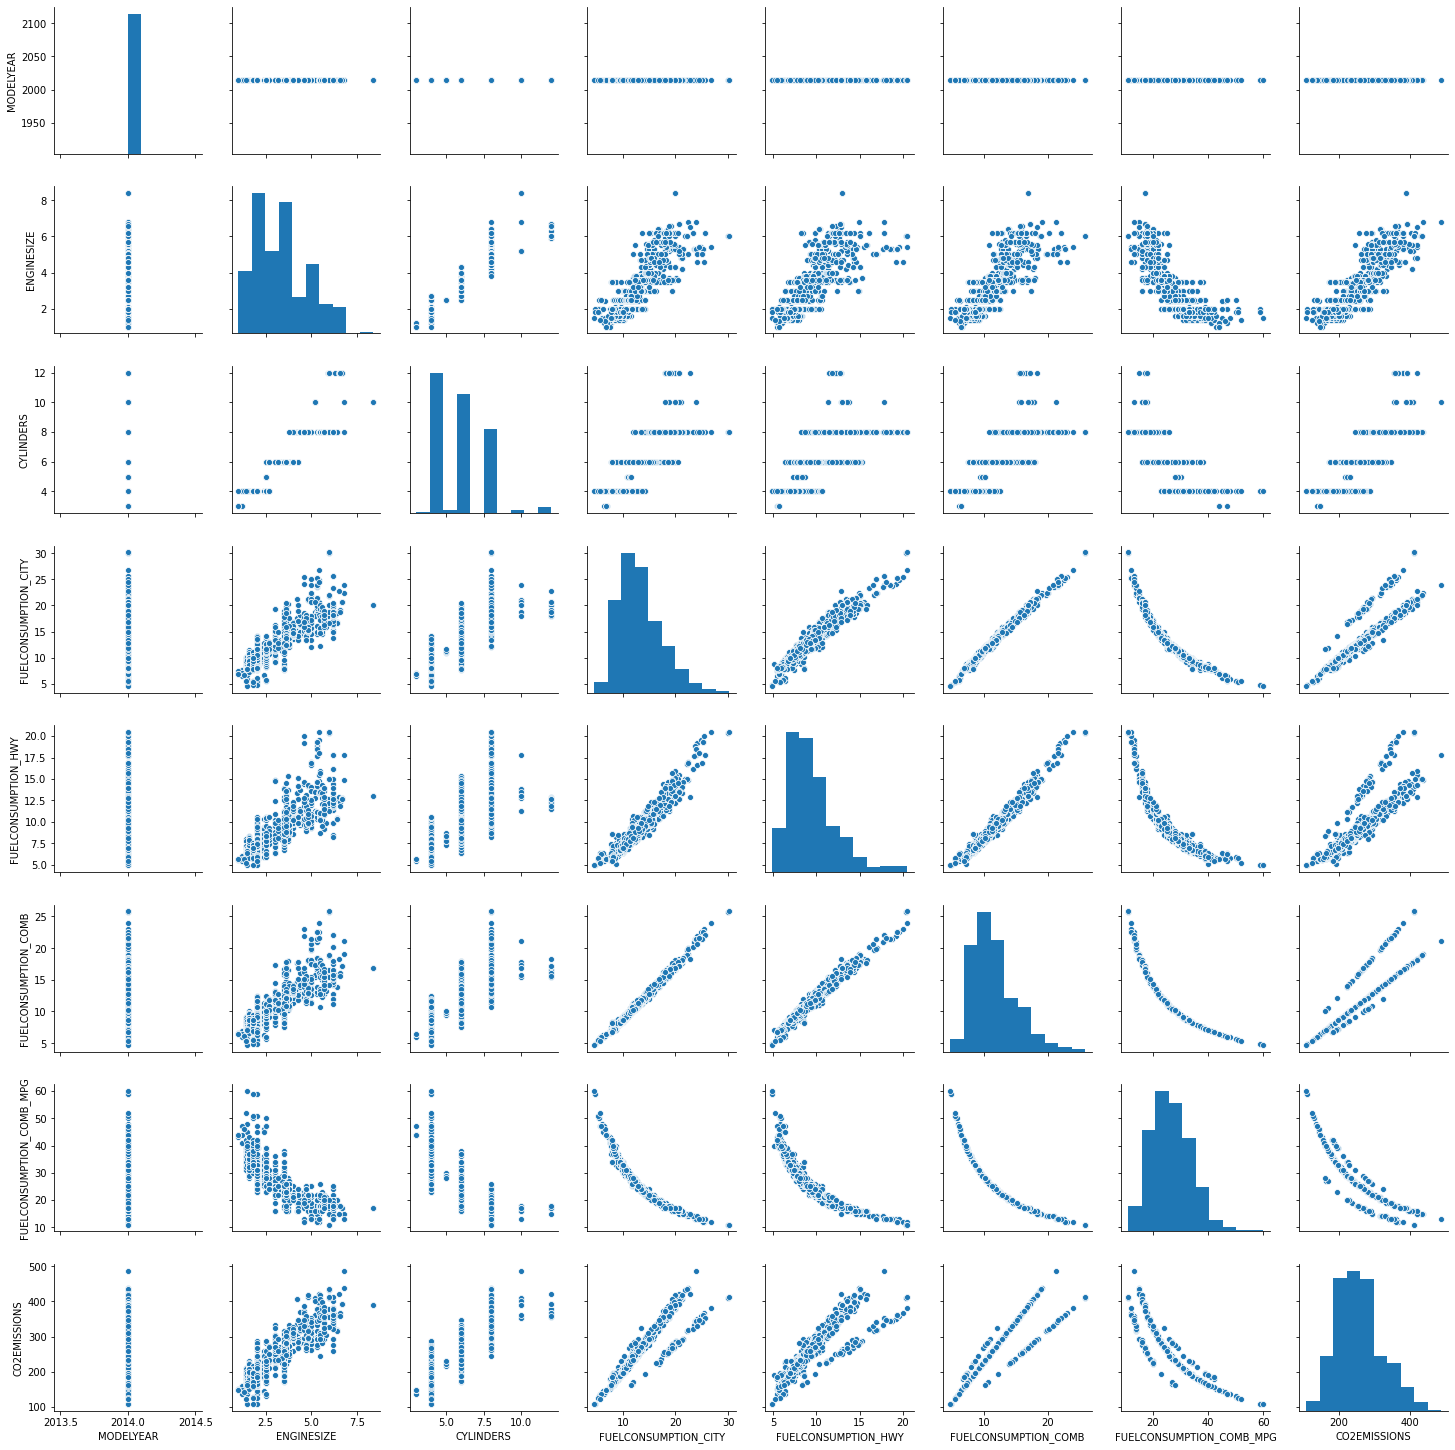

In [ ]:
# Insira aqui seu código

sns.pairplot(df)

# Exercício 3. `FUELCONSUMPTION_COM` X `CO2EMISSIONS` (**RESOLVIDO**)
Explore a relação de `FUELCONSUMPTION_COM` com  `CO2EMISSIONS`

### DICA: 
Embora o `sns.scatterplot(x,y)` possa ser usado para verificar a relação de cada par de variáveis, o `sns.lmplot('x','y',data=df)` vai ainda permitir você visualizar a linha de tendência dos dados. 



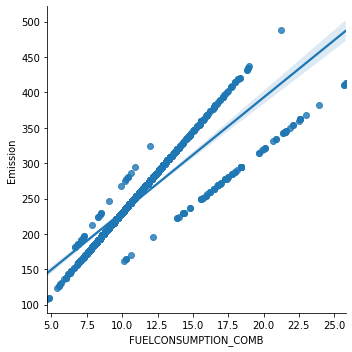

In [ ]:
# Insira aqui seu código

sns.lmplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', data=df)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# Exercíci 4. Regressão Simples

Crie um modelo regressão para obter `CO2EMISSIONS` a partir de `FUELCONSUMPTION_COMB`



In [ ]:
# Insira aqui seu código


# Exercício 5. Resultados
Verifique os resultados do modelo obtido


In [ ]:
# Insira aqui seu código



# Exercício 6. Modelo final

...insira no texto abaixo os coeficientes obtidos.


 



$$ \widehat{CO2EMISSIONS} = <coef1> + <coef2> \times FUELCONSUMPTIONCOMB $$
 



# Exercício 7. Predição
A partir do seu modelo empregue a função `result.predict(x)` para estimar a emissão de gases por veículos novos que apresentam consumo de combustível no valor de 4 e 28, e que não existem nos dados originais. 

### DICA:

A entrada x deve ser um dataframe no mesmo formato e nome dos atributos de entrada no modelo. 
 



In [ ]:
# Seu código

0    133.267015
1    522.546301
dtype: float64

# Exercício 8. Verificação Visual **(RESOLVIDO)**

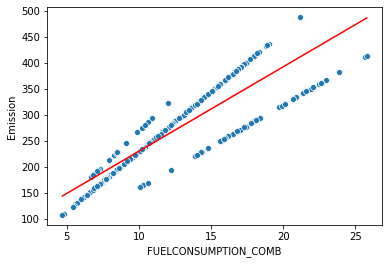

In [ ]:
df['predicted'] = result.predict()

sns.scatterplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', data=df)
sns.lineplot('FUELCONSUMPTION_COMB', 'predicted', data=df, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()




# Exercício 9. Tudo junto...

Coloque todo o código empregado para estimar as emissões de `FUELCONSUMPTION_COMB` aqui.

In [ ]:
# Insira aqui seu código

# define o modelo

# calcula o modelo e mostra os resultados

# faz uma previsão



# Exercício 10. Regressão Múltipla

Faça agora um modelo de regressão múltipla para estimar as emissões de CO2 a partir de `FUELCONSUMPTION_COMB` e `ENGINESIZE`. 

Faça então uma predição de emissões para um veículo com `FUELCONSUMPTION_COMB` = 10 e `ENGINESIZE` = 2. 

In [ ]:
# Insira aqui seu código




                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3220.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:50:57   Log-Likelihood:                -4898.4
No. Observations:                1067   AIC:                             9803.
Df Residuals:                    1064   BIC:                             9818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.3068 

### Solução: O modelo obtido é

$$ \widehat{CO2EMISSIONS} = <coef1> + <coef2> \times ENGINESIZE + <coef3> \times FUELCONSUMPTIONCOMB $$

E apresenta Coeficiente de Determinação e p-values

$$ R^2 = <valor> $$
$$ p-values < 0.05 $$

melhor que os modelos unidimensionais.